Adam Whelpley
14 October 2024
CS379: Machine Learning
Using Titanic data and unsupervised machine learning algorithm to describe the data and using supervised machine learning algorithm to predict who will survive.

First importing necessary packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

Need to iterate through the data and break it into three lists. The first list contains the X coordinates for the supervised algorithm. This takes in the persons' age, sex, and class. Whether that person survived or not is appended to the Y coordinates. The hope here is that using the data fed to X we can predict Y. Another list, clustering, will be used to determine the fares for each class. It is expected that first class ticket seats will have higher prices than third class. Class data and the fare paid for that ticket is stored in the clustering list to be used for an unsupervised model.

In [3]:
try:
    titanicRawData = pd.read_csv("C:\\Users\\pwhel\\School\\Machine Learning\\Unit 1\\TitanicData.csv")
    X = []
    Y = []
    clustering = []

    for i in range(1, len(titanicRawData)):
        row = titanicRawData.loc[i]
        sex = 0                                # default is a female
        # check for nan
        if row["sex"] == 'male':
            sex = 1
        X.append([row["age"], sex, row["pclass"]]) 
        Y.append(row["survived"])
        # get class and fare data for clustering
        if np.isnan(row["fare"]):
            continue
        else:
            clustering.append([row["pclass"], row["fare"]])

except Exception:
    print("File not found")


In [5]:
X

[[0.9167, 1, 1],
 [2.0, 0, 1],
 [30.0, 1, 1],
 [25.0, 0, 1],
 [48.0, 1, 1],
 [63.0, 0, 1],
 [39.0, 1, 1],
 [53.0, 0, 1],
 [71.0, 1, 1],
 [47.0, 1, 1],
 [18.0, 0, 1],
 [24.0, 0, 1],
 [26.0, 0, 1],
 [80.0, 1, 1],
 [nan, 1, 1],
 [24.0, 1, 1],
 [50.0, 0, 1],
 [32.0, 0, 1],
 [36.0, 1, 1],
 [37.0, 1, 1],
 [47.0, 0, 1],
 [26.0, 1, 1],
 [42.0, 0, 1],
 [29.0, 0, 1],
 [25.0, 1, 1],
 [25.0, 1, 1],
 [19.0, 0, 1],
 [35.0, 0, 1],
 [28.0, 1, 1],
 [45.0, 1, 1],
 [40.0, 1, 1],
 [30.0, 0, 1],
 [58.0, 0, 1],
 [42.0, 1, 1],
 [45.0, 0, 1],
 [22.0, 0, 1],
 [nan, 1, 1],
 [41.0, 1, 1],
 [48.0, 1, 1],
 [nan, 1, 1],
 [44.0, 0, 1],
 [59.0, 0, 1],
 [60.0, 0, 1],
 [41.0, 0, 1],
 [45.0, 1, 1],
 [nan, 1, 1],
 [42.0, 1, 1],
 [53.0, 0, 1],
 [36.0, 1, 1],
 [58.0, 0, 1],
 [33.0, 1, 1],
 [28.0, 1, 1],
 [17.0, 1, 1],
 [11.0, 1, 1],
 [14.0, 0, 1],
 [36.0, 1, 1],
 [36.0, 0, 1],
 [49.0, 1, 1],
 [nan, 0, 1],
 [36.0, 1, 1],
 [76.0, 0, 1],
 [46.0, 1, 1],
 [47.0, 0, 1],
 [27.0, 1, 1],
 [33.0, 0, 1],
 [36.0, 0, 1],
 [30.0, 0, 1],

I have broken the data down into this cleaned up version because I am thinking of the "Women and Children" phrase for predicting if a person has survived or not.
I also assume that class determines whether who boards first and who doesn't so I added this plot point as well.
Using these sets of data, we can plug this into a supervised algorithm to predict values

In [6]:
clf = RandomForestClassifier()
clf.fit(X, Y)
predictions = clf.predict(X)

In [7]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

We can break this further to have the model show us the probability of survival

In [59]:
predictionProbability = clf.predict_proba(X)
predictionProbability

array([[0.05      , 0.95      ],
       [0.66090909, 0.33909091],
       [0.81092857, 0.18907143],
       ...,
       [0.93270588, 0.06729412],
       [0.72649152, 0.27350848],
       [0.62722567, 0.37277433]])

Using the first element as an example ([0.05 , 0.95]) shows a 95% chance this person will survive

Next, we can use the unsupervised model to cluster data.

In [65]:
clustering

[[1, 151.55],
 [1, 151.55],
 [1, 151.55],
 [1, 151.55],
 [1, 26.55],
 [1, 77.9583],
 [1, 0.0],
 [1, 51.4792],
 [1, 49.5042],
 [1, 227.525],
 [1, 227.525],
 [1, 69.3],
 [1, 78.85],
 [1, 30.0],
 [1, 25.925],
 [1, 247.5208],
 [1, 247.5208],
 [1, 76.2917],
 [1, 75.2417],
 [1, 52.5542],
 [1, 52.5542],
 [1, 30.0],
 [1, 227.525],
 [1, 221.7792],
 [1, 26.0],
 [1, 91.0792],
 [1, 91.0792],
 [1, 135.6333],
 [1, 26.55],
 [1, 35.5],
 [1, 31.0],
 [1, 164.8667],
 [1, 26.55],
 [1, 26.55],
 [1, 262.375],
 [1, 55.0],
 [1, 26.55],
 [1, 30.5],
 [1, 50.4958],
 [1, 39.6],
 [1, 27.7208],
 [1, 51.4792],
 [1, 76.2917],
 [1, 134.5],
 [1, 26.55],
 [1, 31.0],
 [1, 26.2875],
 [1, 27.4458],
 [1, 512.3292],
 [1, 512.3292],
 [1, 5.0],
 [1, 47.1],
 [1, 47.1],
 [1, 120.0],
 [1, 120.0],
 [1, 120.0],
 [1, 120.0],
 [1, 26.0],
 [1, 27.7208],
 [1, 78.85],
 [1, 78.85],
 [1, 61.175],
 [1, 61.175],
 [1, 53.1],
 [1, 53.1],
 [1, 262.375],
 [1, 86.5],
 [1, 29.7],
 [1, 55.0],
 [1, 0.0],
 [1, 136.7792],
 [1, 136.7792],
 [1, 151.55]

In [66]:
data = np.array(clustering)
clf = KMeans(n_clusters = 3)
clf.fit(data)

centroids = clf.cluster_centers_
labels = clf.labels_

centroids

C:\Users\pwhel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([[  2.54562559,  15.31977422],
       [  1.        , 268.18266216],
       [  1.24154589,  82.76072899]])

This is clustering data and showing an odd pattern. It seems the weight of the data suggests that more first class tickets were purchased. This graph is also showing a large range between the most paid for a ticket versus the least paid for a ticket

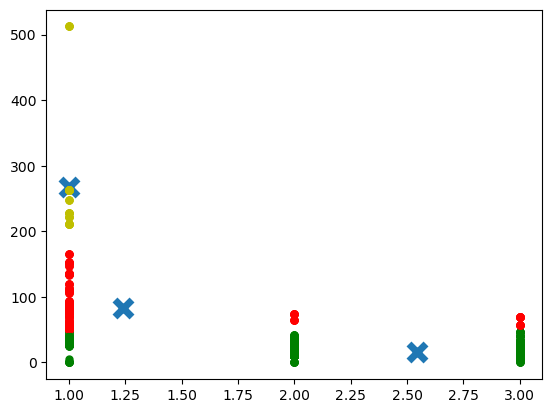

In [67]:
colors = ["g.","y.","r."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5)
plt.show()

Going to retry with some other data pulled

In [138]:
try:
    titanicRawData = pd.read_csv("C:\\Users\\pwhel\\School\\Machine Learning\\Unit 1\\TitanicData.csv")
    tickets = []

    for i in range(1, len(titanicRawData)):
        row = titanicRawData.loc[i]

        # get class and fare data for clustering
        if np.isnan(row["age"]):
            continue
        else:
            tickets.append([row["age"], row["fare"]])

except Exception:
    print("File not found")

In [139]:
tickets

[[0.9167, 151.55],
 [2.0, 151.55],
 [30.0, 151.55],
 [25.0, 151.55],
 [48.0, 26.55],
 [63.0, 77.9583],
 [39.0, 0.0],
 [53.0, 51.4792],
 [71.0, 49.5042],
 [47.0, 227.525],
 [18.0, 227.525],
 [24.0, 69.3],
 [26.0, 78.85],
 [80.0, 30.0],
 [24.0, 247.5208],
 [50.0, 247.5208],
 [32.0, 76.2917],
 [36.0, 75.2417],
 [37.0, 52.5542],
 [47.0, 52.5542],
 [26.0, 30.0],
 [42.0, 227.525],
 [29.0, 221.7792],
 [25.0, 26.0],
 [25.0, 91.0792],
 [19.0, 91.0792],
 [35.0, 135.6333],
 [28.0, 26.55],
 [45.0, 35.5],
 [40.0, 31.0],
 [30.0, 164.8667],
 [58.0, 26.55],
 [42.0, 26.55],
 [45.0, 262.375],
 [22.0, 55.0],
 [41.0, 30.5],
 [48.0, 50.4958],
 [44.0, 27.7208],
 [59.0, 51.4792],
 [60.0, 76.2917],
 [41.0, 134.5],
 [45.0, 26.55],
 [42.0, 26.2875],
 [53.0, 27.4458],
 [36.0, 512.3292],
 [58.0, 512.3292],
 [33.0, 5.0],
 [28.0, 47.1],
 [17.0, 47.1],
 [11.0, 120.0],
 [14.0, 120.0],
 [36.0, 120.0],
 [36.0, 120.0],
 [49.0, 26.0],
 [36.0, 78.85],
 [76.0, 78.85],
 [46.0, 61.175],
 [47.0, 61.175],
 [27.0, 53.1],
 [33.0

In [140]:
clf = KMeans(n_clusters=3)
tickets = np.array(tickets)

In [141]:
np.any(np.isnan(tickets))

True

In [142]:
tickets

array([[  0.9167, 151.55  ],
       [  2.    , 151.55  ],
       [ 30.    , 151.55  ],
       ...,
       [ 26.5   ,   7.225 ],
       [ 27.    ,   7.225 ],
       [ 29.    ,   7.875 ]])

In [143]:
tickets = tickets[~np.isnan(tickets)]

In [144]:
np.any(np.isnan(tickets))

False

I seem to be stuck here. It is not being recognized as a 2d array when converting from list to np.array.
This stack overflow comment says that this conversion should work automatically.

This fix works for now

In [145]:
# stupid fix that works
switch = 0
temp = []
data = []
for i in tickets:
    if switch == 0:
        temp.append(i)
        switch = 1
    else:
        temp.append(i)
        data.append(temp)
        temp = []
        switch = 0
data

[[0.9167, 151.55],
 [2.0, 151.55],
 [30.0, 151.55],
 [25.0, 151.55],
 [48.0, 26.55],
 [63.0, 77.9583],
 [39.0, 0.0],
 [53.0, 51.4792],
 [71.0, 49.5042],
 [47.0, 227.525],
 [18.0, 227.525],
 [24.0, 69.3],
 [26.0, 78.85],
 [80.0, 30.0],
 [24.0, 247.5208],
 [50.0, 247.5208],
 [32.0, 76.2917],
 [36.0, 75.2417],
 [37.0, 52.5542],
 [47.0, 52.5542],
 [26.0, 30.0],
 [42.0, 227.525],
 [29.0, 221.7792],
 [25.0, 26.0],
 [25.0, 91.0792],
 [19.0, 91.0792],
 [35.0, 135.6333],
 [28.0, 26.55],
 [45.0, 35.5],
 [40.0, 31.0],
 [30.0, 164.8667],
 [58.0, 26.55],
 [42.0, 26.55],
 [45.0, 262.375],
 [22.0, 55.0],
 [41.0, 30.5],
 [48.0, 50.4958],
 [44.0, 27.7208],
 [59.0, 51.4792],
 [60.0, 76.2917],
 [41.0, 134.5],
 [45.0, 26.55],
 [42.0, 26.2875],
 [53.0, 27.4458],
 [36.0, 512.3292],
 [58.0, 512.3292],
 [33.0, 5.0],
 [28.0, 47.1],
 [17.0, 47.1],
 [11.0, 120.0],
 [14.0, 120.0],
 [36.0, 120.0],
 [36.0, 120.0],
 [49.0, 26.0],
 [36.0, 78.85],
 [76.0, 78.85],
 [46.0, 61.175],
 [47.0, 61.175],
 [27.0, 53.1],
 [33.0

In [146]:
clf.fit(data)

C:\Users\pwhel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

In [149]:
centroids = clf.cluster_centers_
labels = clf.labels_

centroids


array([[ 35.31644189, 177.93276892],
       [ 28.38888882,  24.76913364],
       [ 41.        , 512.3292    ]])

The clustering algorithm is working but the data is too scattered to make a general distinction. Neither the age nor the class seemed to have an effect on the ticket pricing.

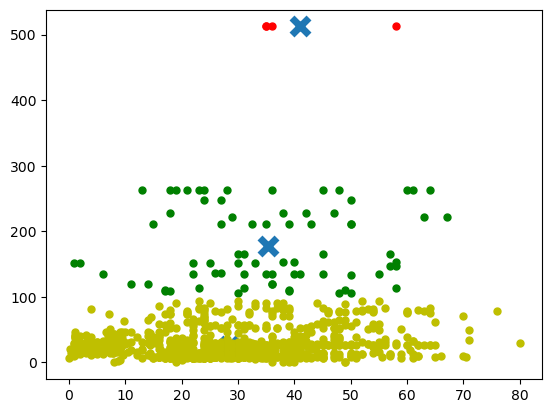

In [151]:
colors = ["g.","y.","r."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5)
plt.show()

I'm not able to find any discernable data in this set that would be clusterable with my limited knowledge on unsupervised clustering.